*Course: Simple Regression in Public Health  
Institution: Johns Hopkins University  
Presenter: John McGready*

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

### 1. Overview of Simple Regression  

The basic structure of these simple regression models is a linear equation: $f(y) = \beta_{0} + \beta_{1}x_{1}$ where $x_{1}$ is a predictor of interest.  

For continuous outcomes, the left-hand side is the mean of the outcome $y$, and the regression type is linear regression.  

For binary outcomes, the left-hand side is the ln(odds) of the binary outcome, i.e.: $\frac{p}{1-p}$ where $p$ is the probability that $y = 1$ (proportion of $y$ values equal to 1) and the regression type is logistic regression.  

For time-to-event outcomes where the individual event and censoring times **are not** known, $y$ is yes/no indicator of whether the event occurred in the common follow-up period; the left-hand side is $ln$(incidence rate), and the regression type is Poisson regression.  

For time-to-event outcomes where the individual event and censoring times **are** known, $y$ is a composite outcome taking into account both the time and whether the event occurred. The left-hand side is $ln$(hazard rate), and the regression type is Cox regression.

#### Simple Linear Regression with a Categorical Predictor  

Data: https://www.kaggle.com/devanshbesain/exploration-and-analysis-auto-mpg/data (retrieved April 20, 2020)

In [3]:
df = pd.read_csv("data/auto-mpg.csv")
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


Here, we will treat `origin` as a categorical variable with three levels in order to show linear regression with a categorical feature. The outcome chosen is `mpg`.

In [4]:
from sklearn.linear_model import LinearRegression

In [5]:
# Number of categories and counts
df['origin'].value_counts()

1    249
3     79
2     70
Name: origin, dtype: int64

In [6]:
def lin_reg_cat(df, x_name, y_name):
    """
    Assumes that x_name is a categorical feature
    """
    df_copy = df.copy()
    df_copy = pd.get_dummies(df_copy, columns=[x_name], drop_first=True)
    
    x_vars = []
    for column in df_copy.columns:
        if column.startswith(x_name):
            x_vars.append(column)
    lr = LinearRegression()
    lr.fit(df_copy[x_vars], df_copy[y_name])
    
    return lr.intercept_, lr.coef_

intercept, coef = lin_reg_cat(df, 'origin', 'mpg')
print(intercept, coef)

20.083534136546184 [ 7.80789443 10.36709877]


The intercept is the mean y value (`mpg`) for the reference group, i.e., origin = 1, and the two coefficients signify the difference for the other group(s) mean(s) compared to the mean from the reference group. Note that the equation for a linear regression with a categorical variable is given by:  

$y = \beta_{0} + \beta_{1}*x_{1} + ... + \beta_{k}*x_{k}$

where $\beta_{0}$ represents the sample mean for the reference group.

In [7]:
print("Mean mpg for reference group 1:", np.mean(df[df['origin']==1]['mpg']))
print("Mean mpg for reference group 2:", np.mean(df[df['origin']==2]['mpg']))
print("Mean mpg for reference group 3:", np.mean(df[df['origin']==3]['mpg']))

Mean mpg for reference group 1: 20.083534136546184
Mean mpg for reference group 2: 27.89142857142857
Mean mpg for reference group 3: 30.450632911392404


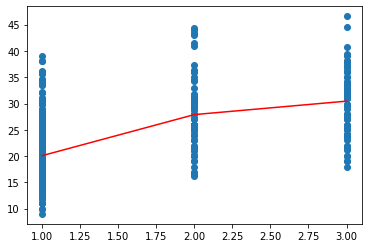

In [8]:
plt.scatter(df['origin'], df['mpg'])
plt.plot([1, 2, 3],[intercept, intercept+coef[0], intercept+coef[1]], 'r-');

#### Simple Linear Regression with a Continuous Predictor  

Data: http://mreed.umtri.umich.edu/mreed/downloads.html (retrieved April 22, 2020)

In [9]:
df = pd.read_csv("data/male_public.csv", encoding = "ISO-8859-1")
print(df.shape)

(4082, 108)


In principle it is possible to categorize a continuous variable, e.g., based on quartiles, and compare the mean differences across the quartiles similar to the dichotomous approach with a categorical variable. However, this results in a significant loss of information and requires multiple summary measures to be compared with each other. Instead, we would like to associate a continuous outcome with a continuous predictor.

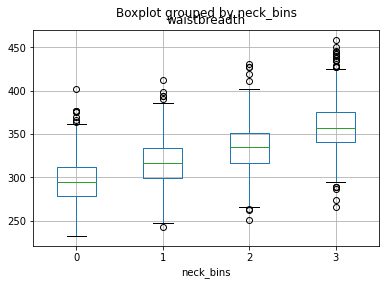

In [10]:
# Categorize neck circumference.
df['neck_bins'] = pd.qcut(df['neckcircumference'], q=[0., 0.25, 0.5, 0.75, 1.], labels=False)
df.boxplot("waistbreadth", by="neck_bins");

In [11]:
# Linear regression with binned neckcircumference (quartiles)
intercept, coef = lin_reg_cat(df, 'neck_bins', 'waistbreadth')
print(intercept, coef)

296.00979431929477 [20.88037909 38.65088432 62.4906954 ]


In [12]:
def check_cat_reg(df, intercept, coef, acc=5):
    """
    Compare mean group values with regression
    with a specified accuracy
    """
    
    print("Mean waistbreadth for reference group 0:", round(np.mean(df[df['neck_bins']==0]['waistbreadth']),acc),\
          "; from regression:", round(intercept,acc))
    print("Mean waistbreadth for reference group 1:", round(np.mean(df[df['neck_bins']==1]['waistbreadth']),acc),\
          "; from regression:", round(intercept+coef[0],acc))
    print("Mean waistbreadth for reference group 2:", round(np.mean(df[df['neck_bins']==2]['waistbreadth']),acc),\
          "; from regression:", round(intercept+coef[1],acc))
    print("Mean waistbreadth for reference group 3:", round(np.mean(df[df['neck_bins']==3]['waistbreadth']),acc),\
          "; from regression:", round(intercept+coef[2],acc))

    
check_cat_reg(df, intercept, coef, acc=3)

Mean waistbreadth for reference group 0: 296.01 ; from regression: 296.01
Mean waistbreadth for reference group 1: 316.89 ; from regression: 316.89
Mean waistbreadth for reference group 2: 334.661 ; from regression: 334.661
Mean waistbreadth for reference group 3: 358.5 ; from regression: 358.5


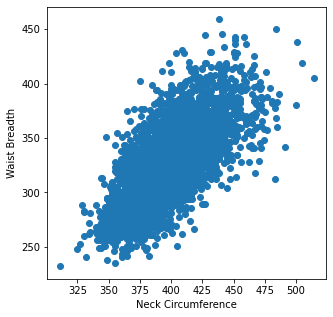

In [13]:
# Use neckcircumference as a continuous measure
plt.figure(figsize=(5,5))
plt.scatter(df['neckcircumference'], df['waistbreadth'])
plt.xlabel('Neck Circumference')
plt.ylabel('Waist Breadth');

In [14]:
def lin_reg_cont(df, x_name, y_name):
    """
    Return intercept and coefficient of linear regression
    """
    lr = LinearRegression()
    lr.fit(df[[x_name]], df[y_name])
    return lr.intercept_, lr.coef_

intercept, coef = lin_reg_cont(df, 'neckcircumference', 'waistbreadth')
print(intercept, coef)

-45.31883900954347 [0.93488522]


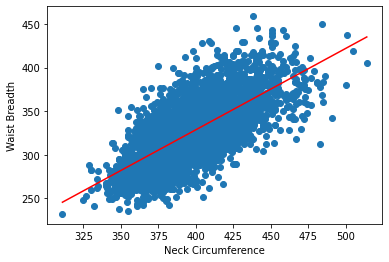

In [15]:
# Plot data with superimposed regression line
plt.scatter(df['neckcircumference'], df['waistbreadth'])
plt.plot([df['neckcircumference'].min(), df['neckcircumference'].max()],
         [intercept+(coef*df['neckcircumference'].min()), intercept+(coef*df['neckcircumference'].max())], 'r')
plt.xlabel('Neck Circumference')
plt.ylabel('Waist Breadth');

The results for the intercept and the coefficient can now be used to estimate the mean value for `waistbreadth` given a certain value for `neckcircumference` within the range of circumferences present in the sample. Estimates for `waistbreadth` using `neckcircumference` values that are lower than the minimum circumference or higher than the maximum circumference are not valid.

#### Estimating the Regression Equation: Accounting for Uncertainty in the Estimates  
The coefficient of determination, denoted $R^{2}$ is the proportion of the variance in the dependent variable that is predictable from the independent variable(s).

In [16]:
from sklearn.metrics import r2_score

y_true = df['waistbreadth']
y_pred = intercept + coef*df['neckcircumference']
print(r2_score(y_true, y_pred))

0.4812396265295581


The Pearson correlation coefficient (r) is a statistic that measures linear correlation between two variables X and Y. It has a value between +1 and −1, where 1 is total positive linear correlation, 0 is no linear correlation, and −1 is total negative linear correlation. Note that the square of the correlation coefficient is equal to the coefficient of determination.

In [17]:
from scipy.stats import pearsonr
corr_coef = pearsonr(df['neckcircumference'], df['waistbreadth'])
print("Correlation coeeficient:", corr_coef[0])
print("Coefficient of determination:", np.square(corr_coef[0]))

Correlation coeeficient: 0.6937143695567781
Coefficient of determination: 0.48123962652955815


### 2. Simple Logistic Regression

The logistic model (or logit model) is used to model the probability of a certain class or event existing such as pass/fail, win/lose, alive/dead or healthy/sick. This can be extended to model several classes of events such as determining whether an image contains a cat, dog, lion, etc. Each object being detected in the image would be assigned a probability between 0 and 1 and the sum adding to one.  

The slope estimate(s), $\beta_{1}$,from a simple logistic regression has a ln(odds ratio) interpretation, and can be exponentiated (anti-logged) to estimate an odds ratio comparing the odds that (the outcome) y=1 for two groups who differ by one-unit in $x_{1}$.  
The intercept estimate, ̂$\beta_{0}$, is the estimated ln(odds that y=1) when $x_{0}$ = 0.

#### Simple Logistic Regression with a Binary (or Categorical) Predictor  
data: https://wwwn.cdc.gov/nchs/nhanes/Search/DataPage.aspx?Component=Examination&CycleBeginYear=2013 and https://wwwn.cdc.gov/nchs/nhanes/Search/DataPage.aspx?Component=Demographics&CycleBeginYear=2013

In [18]:
import xport

In [19]:
lines = []
with open('data/NHANES_Examination_Data_2013_2014.XPT', 'rb') as f:
    for row in xport.Reader(f):
        lines.append(row)

columns = ['seqn', 'weight', 'height', 'bmi']
df_nhanes_exam = pd.DataFrame(np.array(lines)[:, [0,2,8,10]], columns=columns)
df_nhanes_exam.head()

,seqn,weight,height,bmi
0,73557.0,78.3,171.3,26.7
1,73558.0,89.5,176.8,28.6
2,73559.0,88.9,175.3,28.9
3,73560.0,32.2,137.3,17.1
4,73561.0,52.0,162.4,19.7


In [20]:
lines = []
with open('data/NHANES_Demographic_Data_2013_2014.XPT', 'rb') as f:
    for row in xport.Reader(f):
        lines.append(row)
        
columns = ['seqn', 'gender', 'age', 'race']
df_nhanes_demo = pd.DataFrame(np.array(lines)[:, [0,3,4,7]], columns=columns)
df_nhanes_demo.head()

,seqn,gender,age,race
0,73557.0,1.0,69.0,4.0
1,73558.0,1.0,54.0,3.0
2,73559.0,1.0,72.0,3.0
3,73560.0,1.0,9.0,3.0
4,73561.0,2.0,73.0,3.0


In [21]:
df_nhanes = df_nhanes_demo.set_index('seqn').join(df_nhanes_exam.set_index('seqn'), on='seqn', how='inner')
df_nhanes['gender'].replace({1:'male',
                             2:'female'}, inplace=True)
df_nhanes['race'].replace({1:'mexican_american',
                           2:'other_hispanic',
                           3:'white',
                           4:'black',
                           6:'asian',
                           7:'other'}, inplace=True)
df_nhanes['obese'] = df_nhanes['bmi'].apply(lambda x: 1 if x >= 30 else 0)
df_nhanes.head()

,gender,age,race,weight,height,bmi,obese
seqn,,,,,,,
73557.0,male,69.0,black,78.3,171.3,26.7,0
73558.0,male,54.0,white,89.5,176.8,28.6,0
73559.0,male,72.0,white,88.9,175.3,28.9,0
73560.0,male,9.0,white,32.2,137.3,17.1,0
73561.0,female,73.0,white,52.0,162.4,19.7,0


In [22]:
def prop_obese(df, by='gender'):
    """
    Returns percentages of males and females that are obese or not
    """
    total = df.shape[0]
    res = df.groupby([by, 'obese'])['age'].count()
    p_f_o = res['female'][1] / res['female'].sum()
    p_m_o = res['male'][1] / res['male'].sum()
    p_f_no = res['female'][0] / res['female'].sum()
    p_m_no = res['male'][0] / res['male'].sum()
    return p_f_o, p_f_no, p_m_o, p_m_no

p_f_o, p_f_no, p_m_o, p_m_no = prop_obese(df_nhanes)
print("The odds ratio for obesity for females compared to males is:", round((p_f_o/p_f_no)/(p_m_o/p_m_no),2))

The odds ratio for obesity for females compared to males is: 1.47


In [23]:
from sklearn.linear_model import LogisticRegression

In [24]:
def log_reg(df, x, y):
    """
    Returns parameters from a logistic regression using a binary predictor (x)
    """
    df_copy = df.copy()
    df_copy.replace({'female':1, 'male':0}, inplace=True)
    
    clf = LogisticRegression().fit(df_copy[[x]], df_copy[y])
    
    return clf.intercept_, clf.coef_
    
intercept, coef = log_reg(df_nhanes, 'gender', 'obese')
print("Intercept:", intercept, " and beta1:", coef)
print("The ln(odds) ratio is:", np.exp(coef))

Intercept: [-1.3603865]  and beta1: [[0.3814703]]
The ln(odds) ratio is: [[1.46443617]]


From the results above, we can see that the ln(odds of obesity) = $-1.36 + 0.38 * x_{1}$ where $x_{1}$ is 1 for females, 0 for males. The difference in $x{1}$ can only be 1 in this case of course. Recall that a difference in ln(odds) can be re-expressed as the ln of the odds ratio so the odds ratio $OR$ is equal to $e^{\beta_{1}}$ or $e^{0.38}$. Compare the odds ratio for obesity in females as compared to males as calculated from exponiating $\beta_{1}$ to that obtained by calculating the odds ratio from the odds for females and males (see results from `prop_obese`).

In [25]:
# In summary
print("Odds for obesity in males:", np.round(np.exp(intercept), 2))
print("Odds for obesity in females:", np.round(np.exp(coef), 2))

Odds for obesity in males: [0.26]
Odds for obesity in females: [[1.46]]


We can perform logistic regression with multiple predictors as well. 

In [26]:
def log_reg_mult(df, x, y):
    """
    Return coeffients for a logistic regression with more than
    one predictor
    """
    df_copy = df.copy()
    df_copy.dropna(axis=0, inplace=True)
    
    df_copy['race'].replace({'mexican_american':1,
                              'other_hispanic':2,
                              'white':3,
                              'black':4,
                              'asian':5,
                              'other':6}, inplace=True)
    df_copy = pd.get_dummies(df_copy, columns=['race'], drop_first=True)
    
    x_vars = []
    for column in df_copy.columns:
        if column.startswith('race'):
            x_vars.append(column)
    
    x = df_copy.loc[:, x_vars].values
    y = df_copy.loc[:, y].values.ravel()
    
    lr = LogisticRegression()
    lr.fit(x,y)
    # Return x, y for use in statsmodels
    return x, y, lr.intercept_, lr.coef_
    
x, y, intercept, coefficients = log_reg_mult(df_nhanes, 'race', 'obese')

The intercept represents the ln(odds of obesity) for the reference group while the coefficients represent the ln(odds of obesity for the other groups. Here, the reference group is Mexican American.

In [27]:
print("Odds of obesisty for reference group (1):", np.round(np.exp(intercept),2))
for i in range(len(coefficients[0])):
    print("Odds of obesity in group " +str(i+2) + ":", np.round(np.exp(coefficients[0][i]),2))

Odds of obesisty for reference group (1): [0.37]
Odds of obesity in group 2: 0.87
Odds of obesity in group 3: 1.09
Odds of obesity in group 4: 1.13
Odds of obesity in group 5: 0.27
Odds of obesity in group 6: 0.74


#### Simple Logistic Regression: Accounting for Uncertainty in the Estimates  
We will be using statsmodels because it gives us access to standard error and *P* values immediately.

In [28]:
import statsmodels.api as sm
from statsmodels.formula.api import logit

In [29]:
f = 'obese ~ gender'
logitfit = logit(formula = str(f), data = df_nhanes).fit()
logitfit.summary()

Optimization terminated successfully.
         Current function value: 0.546834
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  obese   No. Observations:                 9813
Model:                          Logit   Df Residuals:                     9811
Method:                           MLE   Df Model:                            1
Date:                Sat, 09 May 2020   Pseudo R-squ.:                0.005981
Time:                        10:46:58   Log-Likelihood:                -5366.1
converged:                       True   LL-Null:                       -5398.4
Covariance Type:            nonrobust   LLR p-value:                 9.305e-16
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -0.9785      0.032    -30.776      0.000      -1.041      -0.916
gender[T.male]    -0.3823      0.048     -7.998      0.000      -0.476      -0.289
==================================================================================
"""

Based on the summary, the ln(odds of obesity for males is (-0.9785 - 0.3823) or -1.3608 which, when exponentiated gives us an odds of 0.26, identical to the results obtained using sklearn's `LogisticRegression` (as expected). The ln(odds of obesity) for females = -0.9785 which, after exponentiation, yields and odds of 0.3759. Calculating the odds ratio $OR$ for females compared to males yields 1.46 which, again, is identical to the odds ratio calculated using `LogisticRegression`.   

The advantage using statsmodel's `logit` is that it returns the standard errors for the intercept and coefficient(s) which allows us to construct 95% confidence intervals (CI).  

For example, the 95% CI for the ln(odds of obesity) for females is $(-0.9785 - 2*0.032, -0.9785 + 2*0.032)$ or $(-1.04, -0.91)$. Because this interval does not contain the `null` value for slopes, 0, the ln(odds) is significant.  

Similarly, we can find the CI for the odds, after exponentiating. For females, the calculated odds is 0.3759 and the associated 95% CI is $(0.35, 0.40)$ which does not include the `null` value for ratios, 1, and hence we conclude again that the odds ratio is significant.

#### Estimating Risk and Functions of Risk from Logistic Regression Results

Suppose that the ln(odds of response) for a given treatment is given by $-1.67 + 0.58*x_{1}$ where $x_{1} = 1$ for baseline CD4 < 250 and 0 for subjects with baseline CD4 >= 250. In addition, assume that the SE for $\beta_{0} = 0.12$ and the SE for $\beta_{1} = 0.16$.  
Given a slope and standard error (SE), the function `log_reg_ci` calculates the 95% confiddence intervals (CI) for the ln(odds) and odds.

In [30]:
def log_reg_ci(slope, se):
    
    ci_ln_odds = np.array((slope - 2*se, slope + 2*se))
    ci_odds = np.exp(ci_ln_odds)
    prob = np.exp(slope)/(1+np.exp(slope))
    
    return ci_ln_odds, ci_odds

print(log_reg_ci(0.58, 0.16))
print(log_reg_ci(-0.034, 0.002))

(array([0.26, 0.9 ]), array([1.29693009, 2.45960311]))
(array([-0.038, -0.03 ]), array([0.96271294, 0.97044553]))


#### Relationship Between Odds and Probability:  

The estimated odds for a single group is $\frac{\hat{p}}{1 - \hat{p}}$.  

From here we can calculate $\hat{p}$ as $\frac{odds}{1 + odds}$ or $\frac{e^{ln(odds)}}{1 + e^{ln(odds)}}$.  

Suppose the ln(odds of respiratory failure) in different groups is given by $-5.5 + 3.4*x_{1} + 2.8*x_{2} +2.0*x_{3}$

In [31]:
# Estimated risk (probability, proportion) of repiratory failure in the reference group:
est_odds = np.exp(-5.5)
est_risk = est_odds / (1 + est_odds)
print(round(est_risk, 3))

0.004


Based on the results of the model what is the odds ratio of respiratory failure for children with gestational age of 36 (group 3) weeks compared to children with gestational age of 34 weeks (group 2)?

In [32]:
est_odds_36 = np.exp(-5.5 + 2.0)
est_odds_34 = np.exp(-5.5 + 3.4)
odds_ratio = est_odds_36 / est_odds_34
print("Odds ratio:", round(odds_ratio, 2))

Odds ratio: 0.25


The odds ratio can also be computed when the predictor variable is continuous. If the odds of being obese based on the HDL level is given by ln(odds of obesity) = $1.20 - 0.034*x_{1}$, we can calculate the ln(odds ratio) for two groups as follows:

In [33]:
est_odds_100 = np.exp(1.20 - 0.034*100)
est_odds_80 = np.exp(1.20 - 0.034*80)
print("Odds ratio:", round(est_odds_100 / est_odds_80, 2))
# alternatively
print("Odds ratio:", round(np.exp(-0.034*20), 2)) # since 100-80 = 20

Odds ratio: 0.51
Odds ratio: 0.51


### 3. Simple Cox Regression  
The purpose of the model is to evaluate simultaneously the effect of several factors on survival. In other words, it allows us to examine how specified factors influence the rate of a particular event happening (e.g., infection, death) at a particular point in time. This rate is commonly referred as the hazard rate. Predictor variables (or factors) are usually termed covariates in the survival-analysis literature.  
Cox regression models the natural ln(hazard) of a binary outcome `y` as a function of a predictor $x_{1}$, and the follow-up time `t` where $x_{1}$ can be binary, nominal categorical or continuous.  
The regression equation can be written as:  

$ln(\lambda(x_{1},t) = ln(\hat\lambda_{0}(t)) + \hat\beta_{1}x_{1}$ where $\lambda(x_{1},t)$ = (hazard of y = 1) and $\beta_{1}$ is the change in the ln(hazard that y = 1) for a one-unit change in $x_{1}$ at any time in the follow-up period.  

The difference in ln(hazard) between two groups who differ by one unit of $x_{1}$ is the same regardless of the time of comparison.

#### Simple Cox Regression with a Binary (or Categorical) Predictor

data https://www4.stat.ncsu.edu/~boos/var.select/pbc.html  

futime = (number of days between registration and the earlier of death, transplantion, or study analysis time in July, 1986)  
status = (0=alive, 1=liver transplant, 2=dead)  
drug = (1= D-penicillamine, 2=placebo)

In [34]:
# Load and prepare data
columns = ['id', 'futime', 'status', 'drug', 'age', 'sex', 'ascites', 'hepato', 'spiders',
            'edema', 'bili', 'chol', 'albumin', 'copper', 'alk_phos', 'sgot', 'trig', 'platelet',
            'protime', 'stage']
df_pbc = pd.read_csv('data/pbc.txt', sep=r"\s*", names=columns, engine='python')
df_pbc['drug'].replace({'2':'0'}, inplace=True) # set placebo as reference (0)
df_pbc = df_pbc[df_pbc['drug'] != '.'] # remove rows with missing data in 'drug' column
df_pbc['drug'] = df_pbc['drug'].astype(int)
df_pbc['status'].replace({1:0, 2:1}, inplace=True) # recode liver transplant as alive(0), dead as 1
df_pbc.head()

,id,futime,status,drug,age,sex,ascites,hepato,spiders,edema,bili,chol,albumin,copper,alk_phos,sgot,trig,platelet,protime,stage
0,1,400,1,1,21464,1,1,1,1,1.0,14.5,261,2.60,156,1718.0,137.95,172,190,12.2,4
1,2,4500,0,1,20617,1,0,1,1,0.0,1.1,302,4.14,54,7394.8,113.52,88,221,10.6,3
2,3,1012,1,1,25594,0,0,0,0,0.5,1.4,176,3.48,210,516.0,96.10,55,151,12.0,4
3,4,1925,1,1,19994,1,0,1,1,0.5,1.8,244,2.54,64,6121.8,60.63,92,183,10.3,4
4,5,1504,0,0,13918,1,0,1,1,0.0,3.4,279,3.53,143,671.0,113.15,72,136,10.9,3


In [35]:
from sksurv.linear_model import CoxPHSurvivalAnalysis
from sksurv.util import Surv

# construct structured array with "Surv"
# https://scikit-survival.readthedocs.io/en/latest/generated/sksurv.util.Surv.html?highlight=surv
data_y = Surv.from_dataframe('status', 'futime', df_pbc)
cox = CoxPHSurvivalAnalysis()
cox.fit(df_pbc[['drug']], data_y)
print('Slope for treatment (ln(hazard ratio)):', round(float(cox.coef_),3))
print('Hazard ratio for treatment:', round(float(np.exp(cox.coef_)),2))

Slope for treatment (ln(hazard ratio)): 0.057
Hazard ratio for treatment: 1.06


The results shown above indicate that patients receiving the treatment (D-penicillamine) had a 6% higher chance of experiencing the event (death) as compared to the group receiving the placebo at the same time in the follow-up period. Indeed, as shown in the graph below, the differences between the two survival curves are very small.

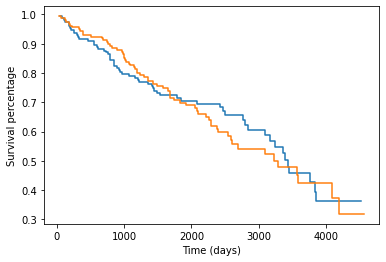

In [36]:
from sksurv.nonparametric import kaplan_meier_estimator

for group in (0, 1):
    mask = df_pbc["drug"] == group
    time, surv_prob = kaplan_meier_estimator(
        data_y["status"][mask],
        data_y["futime"][mask])

    plt.step(time, surv_prob, where="post",
             label="Treatment = {}".format(group))
plt.xlabel("Time (days)")
plt.ylabel("Survival percentage");

#### Simple Cox Regression with a Continuous Predictor

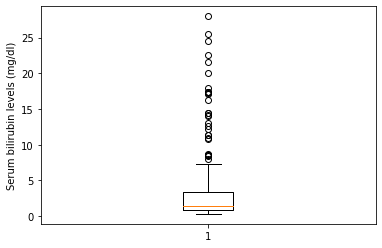

In [37]:
plt.boxplot(df_pbc['bili'])
plt.ylabel("Serum bilirubin levels (mg/dl)");

The estimated hazard ratio of death for two groups of patient with bilirubin levels that differ by 1 mg/dl is calculated below. Note that the intercept, $\beta_{0}$ is a baseline quantity which establishes the shape of the death risk over time.

In [38]:
cox = CoxPHSurvivalAnalysis()
cox.fit(df_pbc[['bili']], data_y)
print('ln(hazard ratio for mortality at time t):', round(float(cox.coef_),3))
print('Hazard ratio:', round(float(np.exp(cox.coef_)),2))

ln(hazard ratio for mortality at time t): 0.149
Hazard ratio: 1.16


**Q: What is the estimated hazard ratio for persons with bilirubin levels of 3.5 mg/dL versus 0.8 mg/dL (at any specific time point in the follow-up period)?**

In [39]:
hr = np.exp(cox.coef_ * (3.5-0.8)) # or np.exp(0.15)**(3.5-0.8)
print(round(float(hr),2))

1.49


The calculated hazard ratio shows that patients with a baseline bilirubin level of 3.5. mg/dL had a 49% higher probability of experiencing the event, death, than those with a baseline bilirubin level of 0.8 mg/dL.  

Note that this does not necessarily mean that the relationship is linear. We can subdivide the bilirubin values into quartiles and perform a Cox survival analysis using the nominal ordinal data.

In [40]:
df_pbc['quartiles'] = pd.qcut(x=df_pbc['bili'], q=4, labels=[0,1,2,3])
df = pd.concat([df_pbc, pd.get_dummies(df_pbc['quartiles'], prefix='q', drop_first=True)], axis=1)

In [41]:
cox = CoxPHSurvivalAnalysis()
cox.fit(df[['q_1', 'q_2', 'q_3']], data_y)
print("Coefficients:", cox.coef_)

Coefficients: [0.38566377 1.49876648 2.61183509]


From the results it appears that, as bilirubin increases, the ln(hazard) increases as well, first by 0.4 and followed by 1.1 (1.5 - 0.4) and 0.9 (2.6 - 1.5) across the levels.

#### Simple Cox Regression: Accounting for Uncertainty in the Estimates

Given a slope ($\beta_{1}$) and an associated standard error (SE), the confidence intervals for the slope and the associated hazard ratio (HR) can be calculated as follows:

In [42]:
def ci_cox(slope, se):
    """
    Returns the 95% confidence intervals for the slope and the
    associated hazard ration
    """
    ci_95_slope = (slope - 2*se, slope + 2*se)
    ci_95_hr = np.exp(ci_95_slope)
    return ci_95_slope, ci_95_hr
    
ci_slope, ci_hr = ci_cox(0.057, 0.18)
print("CI (95%) for slope:", ci_slope)
print("CI (95%) for hr:", ci_hr)

ci_slope, ci_hr = ci_cox(0.15, 0.013)
print("CI (95%) for slope:", ci_slope)
print("CI (95%) for hr:", ci_hr)

CI (95%) for slope: (-0.303, 0.417)
CI (95%) for hr: [0.7385991  1.51740251]
CI (95%) for slope: (0.124, 0.176)
CI (95%) for hr: [1.13201587 1.19243806]


#### Estimating Survival Curves from Cox Regression Results  

The results from any Cox regression model can be translated into estimated survival curves for groups with different x values.

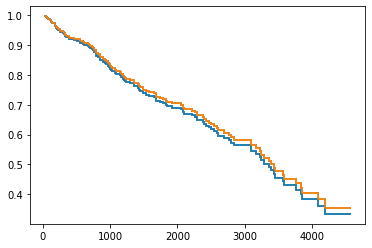

In [43]:
cox = CoxPHSurvivalAnalysis()
cox.fit(df_pbc[['drug']], data_y)
pred_curves = cox.predict_survival_function(df_pbc[['drug']])
for curve in pred_curves:
    plt.step(curve.x, curve.y, where="post")

### 4. Confounding and Adjustment  

A confounder (also confounding variable, confounding factor, or lurking variable) is a variable that influences both the dependent variable and independent variable, causing a spurious association.  
There are three conditions that must be present for confounding to occur:  
- The confounding factor must be associated with both the risk factor of interest and the outcome. 
- The confounding factor must be distributed unequally among the groups being compared.  
- A confounder cannot be an intermediary step in the causal pathway from the exposure of interest to the outcome of interest.

In [44]:
df_conf = pd.DataFrame(columns = ['sex', 'disease', 'smoking'])

In [45]:
df_conf['sex'] = [0]*200 + [1]*250 # male:0, female:1
df_conf['disease'] = [1]*33 + [0]*167 + [1]*83 + [0]*167 # disease:1, no disease:0
df_conf['smoking'] = [1]* 29 + [0]*4 + [1]*131 + [0]*36 + \
                     [1]*23 + [0]*60 + [1]*27 + [0]*140
df_conf = df_conf.sample(frac=1.)
df_conf.head()

,sex,disease,smoking
384,1,0,0
370,1,0,0
345,1,0,0
444,1,0,0
114,0,0,1


In [46]:
# Calculate relative risk of having disease based on smoking status
def rr(df, predictor='smoking', outcome='disease'):
    smoke_disease = df[(df[outcome] == 1) & (df[predictor] == 1)]
    smoke_no_disease = df[(df[outcome] == 1) & (df[predictor] == 0)]

    n_smokers = df[df[predictor] == 1]
    n_no_smokers = df[df[predictor] == 0]

    rr = (len(smoke_disease)/len(n_smokers)) / (len(smoke_no_disease)/len(n_no_smokers))
    
    print("Relative risk:", round(rr,2))

rr(df_conf)

Relative risk: 0.93


In [47]:
# Calculate relative risk of having disease based on smoking status
def rr_conf(df, predictor='smoking', confounder='sex', outcome='disease'):
    
    for elem in df[confounder].unique():
        smoke_disease = df[(df[outcome] == 1) & (df[predictor] == 1) & (df[confounder] == elem)]
        smoke_no_disease = df[(df[outcome] == 1) & (df[predictor] == 0) & (df[confounder] == elem)]

        n_smokers = df[(df[predictor] == 1) & (df[confounder] == elem)]
        n_no_smokers = df[(df[predictor] == 0) & (df[confounder] == elem)]

        rr = (len(smoke_disease)/len(n_smokers)) / (len(smoke_no_disease)/len(n_no_smokers))
    
        print("Relative risk for counfounder " + str(elem) + ":", round(rr,2))

rr_conf(df_conf)

Relative risk for counfounder 1: 1.53
Relative risk for counfounder 0: 1.81


As shown above, the relative risk of disease based on smoking status is confounded by sex. Males more likely to be smokers, and females more likely to have disease. Thus, the nature of an association can change (and even reverse direction) or disappear when data from several groups are combined to form a single group.

### 5. Effect modification  
Effect modification can be present when a variable differentially (positively and negatively) modifies the observed effect of a risk factor on disease status. Different groups have different risk estimates when effect modification is present.

In [48]:
rr(df_pbc, predictor='drug', outcome='status') # Crude, unadjusted, incidence rate ratio

Relative risk: 1.06


In [49]:
n_males = len(df_pbc[df_pbc['sex']==0])
n_females = len(df_pbc[df_pbc['sex']==1])
(n_males*1.25 + n_females*1.0) / (n_males+n_females) # Sex-adjusted incidence rate ratio

1.0288461538461537

In [50]:
rr_conf(df_pbc, predictor='drug', confounder='sex', outcome='status') # Sex-specific (stratified) estimates

Relative risk for counfounder 1: 1.0
Relative risk for counfounder 0: 1.25
